<a href="https://colab.research.google.com/github/DigvijaysingPatil/Determining-Status-for-Loan-Applicants/blob/main/Optimizing_Investments_in_Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df = pd.read_excel('/content/drive/MyDrive/data /stock_data.xlsx')


In [5]:
df.head()

,Date,Amazon,Facebook
0,2016-01-04,636.989990,102.220001
1,2016-01-05,633.789978,102.730003
2,2016-01-06,632.650024,102.970001
3,2016-01-07,607.940002,97.919998
4,2016-01-08,607.049988,97.330002


In [7]:
df1 = pd.read_csv('/content/drive/MyDrive/data /benchmark_data.csv')

In [9]:
df1.head()

,Date,S&P 500
0,2016-01-01,NaN
1,2016-01-04,2012.66
2,2016-01-05,2016.71
3,2016-01-06,1990.26
4,2016-01-07,1943.09


In [10]:
df.shape

(252, 3)

In [17]:
df1.shape

(261, 2)

In [18]:
df.shape

(252, 2)

In [19]:
df1.drop('Date',axis ='columns',inplace =True)

In [20]:
df1.shape

(261, 1)

In [21]:
print("The Stock Data for Amazon and Facebook")
print(df.head(1))

The Stock Data for Amazon and Facebook
      Amazon    Facebook
0  636.98999  102.220001


In [22]:
print("\n The last Record for Amazon and Facebook")
print(df.tail(1))



 The last Record for Amazon and Facebook
         Amazon    Facebook
251  749.869995  115.050003


In [23]:
print("\n The BenchMark Data (S&P Global)")
print(df1.head(1))

print("\n The last record for BenchMark Data (S&P Global)")
print(df1.tail(1))


 The BenchMark Data (S&P Global)
   S&P 500
0      NaN

 The last record for BenchMark Data (S&P Global)
     S&P 500
260  2238.83


In [24]:
# lets check the statistics for the Stock and Benchmark Data

print("Descriptive Statistics for Stock Data: Amazon and Facebook")
print(df.describe())

print("\n Descriptive Statistics for Benchmark Data: S&P 500")
print(df1.describe())

Descriptive Statistics for Stock Data: Amazon and Facebook
           Amazon    Facebook
count  252.000000  252.000000
mean   699.523135  117.035873
std     92.362312    8.899858
min    482.070007   94.160004
25%    606.929993  112.202499
50%    727.875000  117.765000
75%    767.882492  123.902503
max    844.359985  133.279999

 Descriptive Statistics for Benchmark Data: S&P 500
           S&P 500
count   252.000000
mean   2094.651310
std     101.427615
min    1829.080000
25%    2047.060000
50%    2104.105000
75%    2169.075000
max    2271.720000


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# setting charts size and style
plt.rcParams['figure.figsize'] = (15, 4)
plt.style.use('fivethirtyeight')

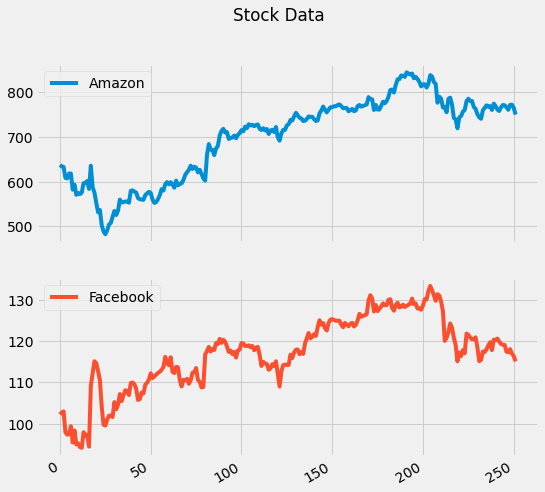

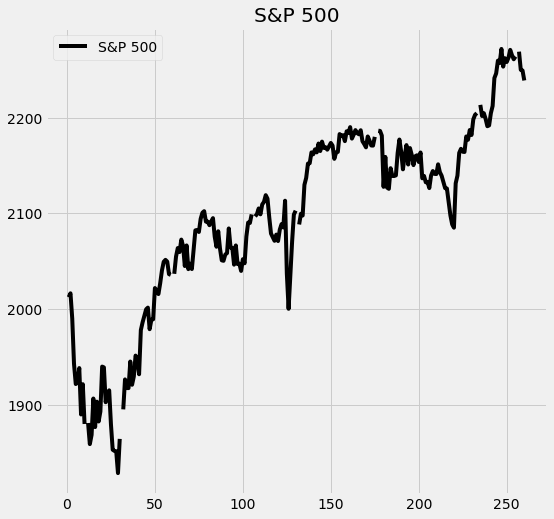

In [27]:
# lets visualize the Stock Market Data

plt.rcParams['figure.figsize'] = (8, 8)
df.plot(subplots = True, title = 'Stock Data')
df1.plot(title = 'S&P 500', color = 'black')
plt.show()

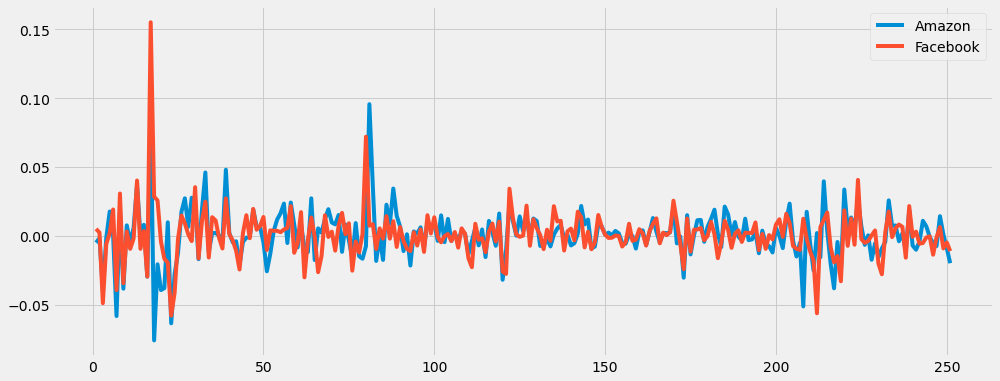

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


In [29]:
# calculate daily stock_data returns using the pct-change function
stock_returns = df.pct_change()

# plot the daily returns using the plot function
plt.rcParams['figure.figsize'] = (15, 6)
stock_returns.plot()
plt.show()

# summarize the daily returns using describe function
stock_returns.describe()

count    259.000000
mean       0.000444
std        0.008078
min       -0.035920
25%       -0.002802
50%        0.000135
75%        0.004378
max        0.024760
Name: S&P 500, dtype: float64

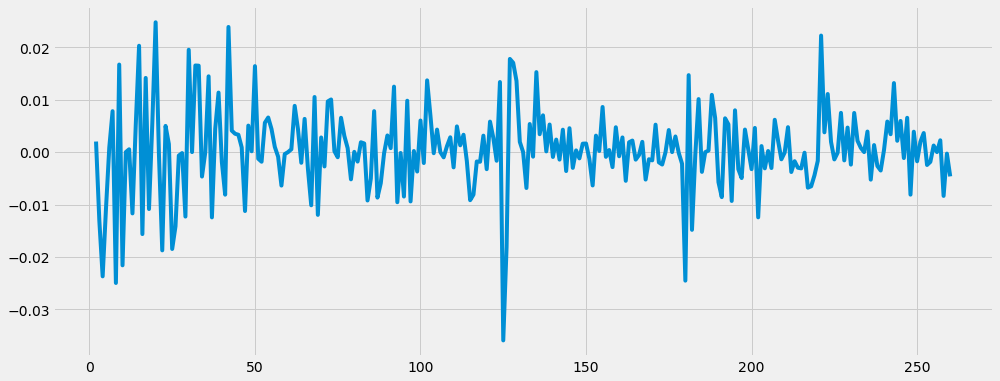

In [30]:
# calculate daily benchmark_data returns
sp_returns = df1['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot()

# summarize the daily returns
sp_returns.describe()

Calculating Excess Returns for Amazon and Facebook vs. S&P 500¶
Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

,Amazon,Facebook
count,250.000000,250.000000
mean,0.000340,0.000106
std,0.020052,0.018859
min,-0.068637,-0.063097
25%,-0.010075,-0.007665
50%,0.000106,-0.000845
75%,0.008596,0.007842
max,0.097477,0.141070


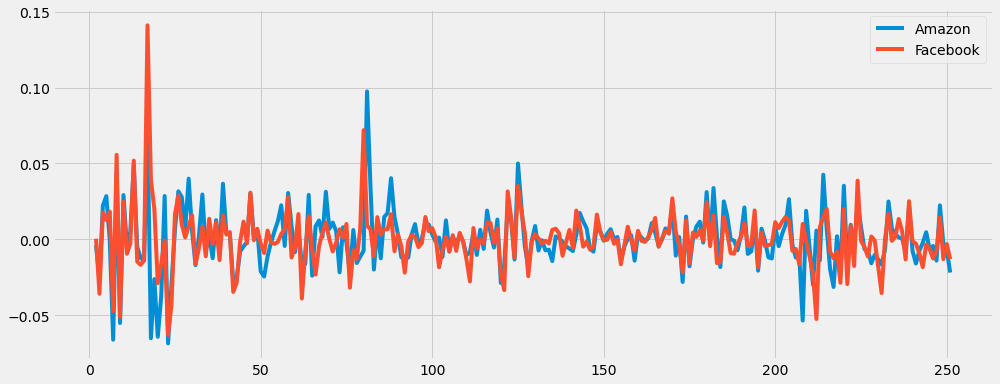

In [32]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

# plot the excess_returns
excess_returns.plot()

# summarize the excess_returns
excess_returns.describe()

Calculating Excess Returns for Amazon and Facebook vs. S&P 500¶
Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

,Amazon,Facebook
count,250.000000,250.000000
mean,0.000340,0.000106
std,0.020052,0.018859
min,-0.068637,-0.063097
25%,-0.010075,-0.007665
50%,0.000106,-0.000845
75%,0.008596,0.007842
max,0.097477,0.141070


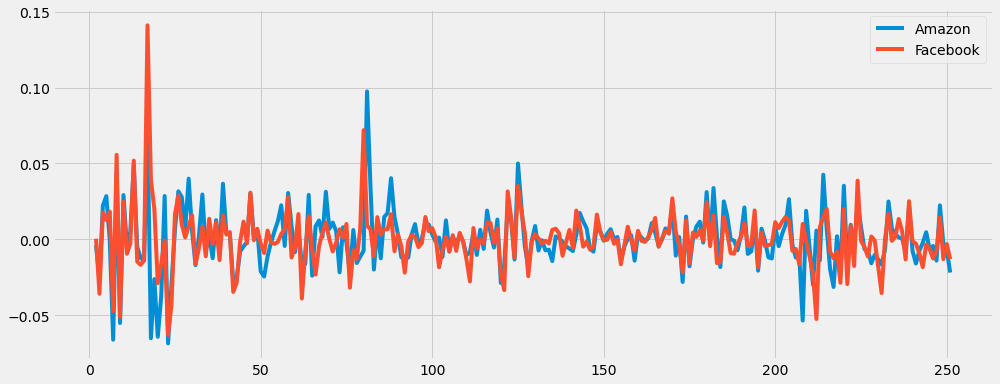

In [35]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

# plot the excess_returns
excess_returns.plot()

# summarize the excess_returns
excess_returns.describe()

The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500¶
Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

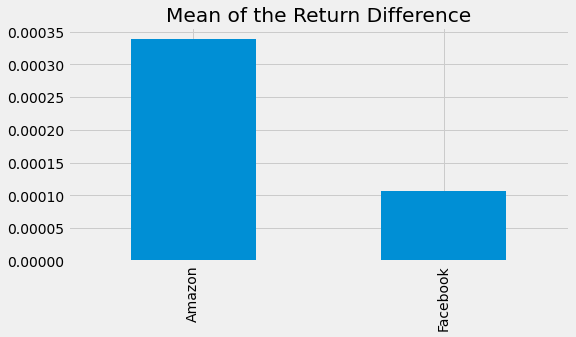

In [36]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
plt.rcParams['figure.figsize'] = (8,4)
avg_excess_return.plot.bar(title = 'Mean of the Return Difference')
plt.show()

The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference¶
It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.

Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

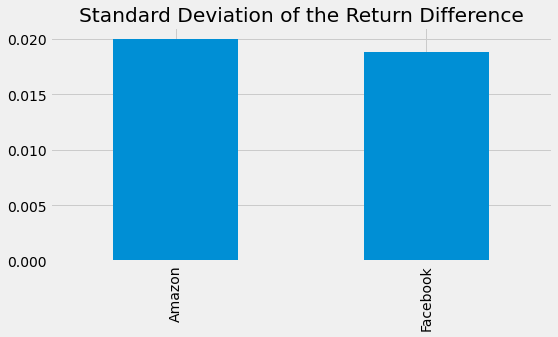

In [38]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference')
plt.show()

10. Putting it all together¶
Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we’ll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252

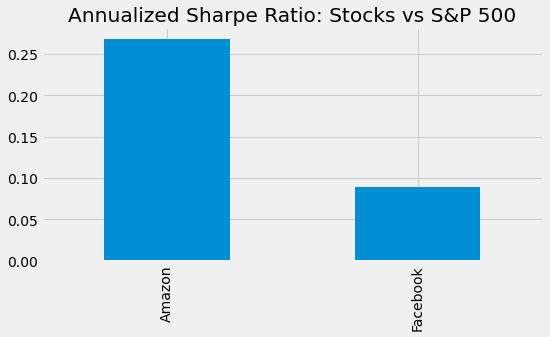

In [40]:
 #calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')
plt.show()

WE Conclude, that we should buy Amazon’s Stock in place of Facebook¶
Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.

This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an ‘apples-to-apples’ basis.